In [35]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
df = pd.read_csv(r"D:\Mtrx\income_evaluation.csv")

In [37]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [39]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [40]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [41]:
df.columns = df.columns.str.strip().str.replace(' ', '')
df.columns = df.columns.str.strip().str.replace('-', '_')
df.columns = df.columns.str.lower()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [42]:
df['capital_gain'].value_counts()

capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

In [43]:
df['capital_loss'].value_counts()

capital_loss
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: count, Length: 92, dtype: int64

In [44]:
df['fnlwgt'].value_counts()

fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: count, Length: 21648, dtype: int64

In [45]:
df['hours_per_week'].value_counts()

hours_per_week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64

In [46]:
df1 = df

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
'''df1['fnlwgt'] = scaler.fit_transform(df[['fnlwgt']])
df1['fnlwgt']

SyntaxError: incomplete input (2041860921.py, line 1)

In [ ]:
'''df1['capital_gain'] = scaler.fit_transform(df[['capital_gain']])
df1['capital_gain']

0        0.148453
1       -0.145920
2       -0.145920
3       -0.145920
4       -0.145920
           ...   
32556   -0.145920
32557   -0.145920
32558   -0.145920
32559   -0.145920
32560    1.888424
Name: capital_gain, Length: 32561, dtype: float64

In [ ]:
'''df1['capital_loss'] = scaler.fit_transform(df[['capital_loss']])
df1['capital_loss']

0       -0.21666
1       -0.21666
2       -0.21666
3       -0.21666
4       -0.21666
          ...   
32556   -0.21666
32557   -0.21666
32558   -0.21666
32559   -0.21666
32560   -0.21666
Name: capital_loss, Length: 32561, dtype: float64

In [ ]:
'''df1['hours_per_week'] = scaler.fit_transform(df[['hours_per_week']])
df1['hours_per_week']

0       -0.035429
1       -2.222153
2       -0.035429
3       -0.035429
4       -0.035429
           ...   
32556   -0.197409
32557   -0.035429
32558   -0.035429
32559   -1.655225
32560   -0.035429
Name: hours_per_week, Length: 32561, dtype: float64

In [48]:
df["income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [49]:
binary_labels = []
for i in df1["income"]:
    if i ==' <=50K' :
        binary_labels.append(0)
    elif i ==' >50K' :
        binary_labels.append(1)
df1["income"] = binary_labels
df1["income"] 

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

c:\Users\arzuh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


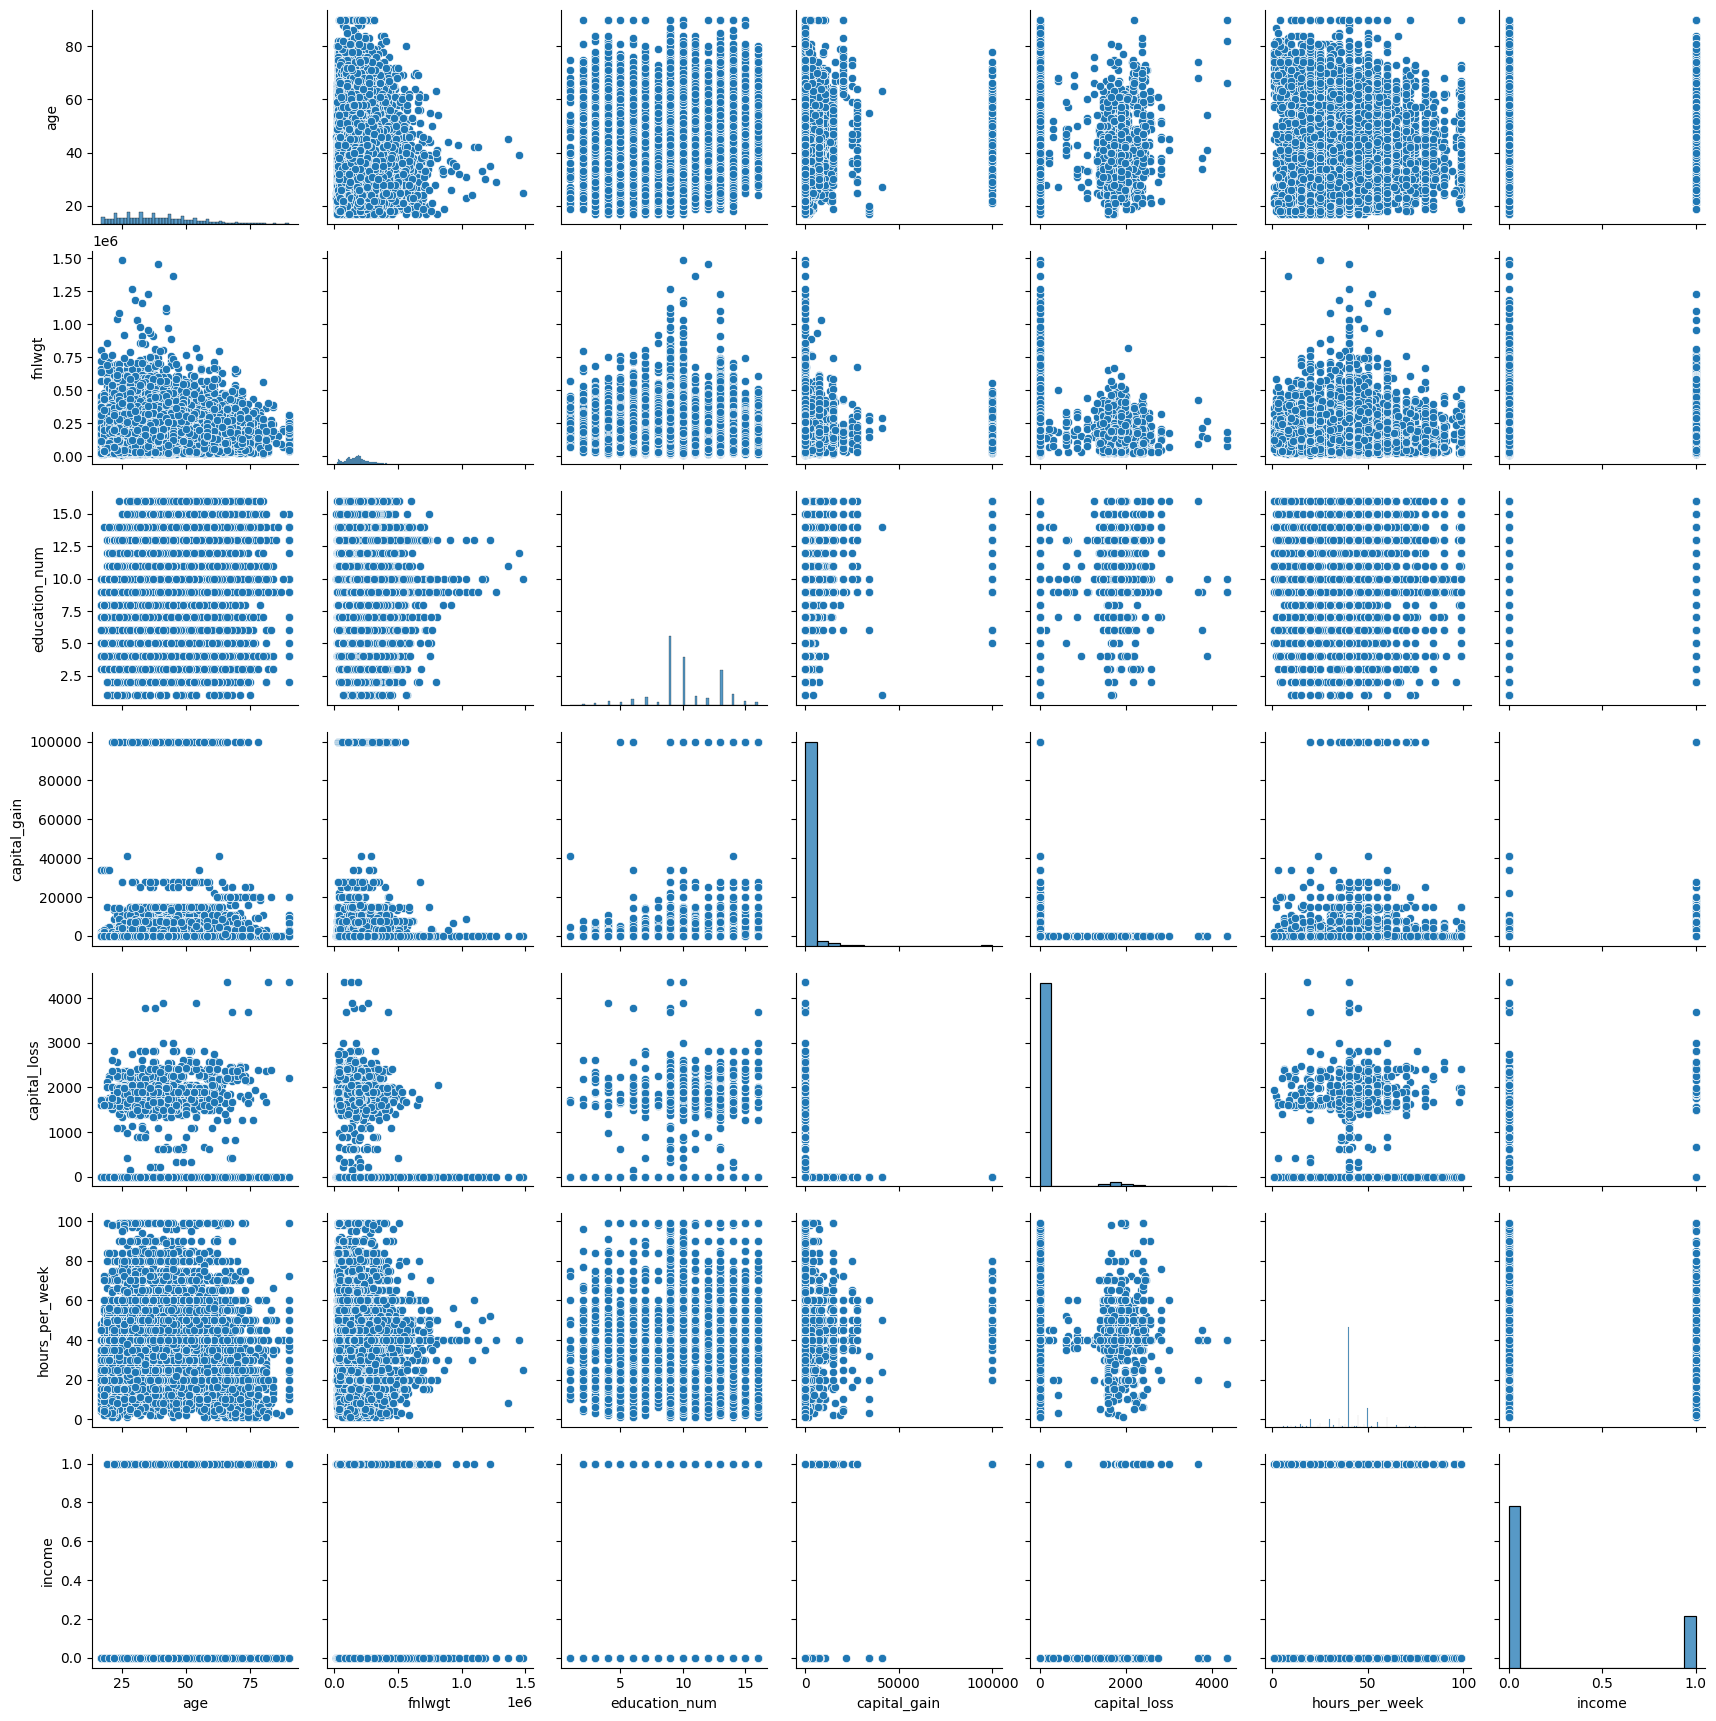

In [50]:
sns.pairplot(df1)


In [51]:
df.income.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [52]:
df[['education', 'education_num']]

,education,education_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


In [53]:
df[['marital_status', 'relationship']]

,marital_status,relationship
0,Never-married,Not-in-family
1,Married-civ-spouse,Husband
2,Divorced,Not-in-family
3,Married-civ-spouse,Husband
4,Married-civ-spouse,Wife
...,...,...
32556,Married-civ-spouse,Wife
32557,Married-civ-spouse,Husband
32558,Widowed,Unmarried
32559,Never-married,Own-child


In [54]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [55]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [56]:
df1 = df


In [57]:
df["workclass"].unique()
#one hot encoding

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [58]:
df['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [59]:
df['native_country'].value_counts()


native_country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [60]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [61]:
df1 = df1[((df1['occupation'] != ' ?') & (df1['workclass'] != ' ?')&(df1['native_country'] != ' ?'))]

In [ ]:
"""countries = []
for value in df1['native_country']:
    if value == 'United States':
        countries.append("US")
    else:
        countries.append("Other")  

df1["native_country"] = countries
df1["native_country"]

C:\Users\arzuh\AppData\Local\Temp\ipykernel_14172\1701739393.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["native_country"] = countries


0        Other
1        Other
2        Other
3        Other
4        Other
         ...  
32556    Other
32557    Other
32558    Other
32559    Other
32560    Other
Name: native_country, Length: 30162, dtype: object

In [62]:
df['occupation'].value_counts()
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [63]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [64]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [65]:
df1["relationship"].value_counts()

relationship
 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: count, dtype: int64

In [66]:
filtered_rows = df[(df['occupation'] == ' ?') | (df['workclass'] == ' ?')| (df['native_country'] == ' ?')]
filtered_rows

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,1
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,1
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,0
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


In [67]:
df1 = df1[((df1['occupation'] != ' ?') & (df1['workclass'] != ' ?')&(df1['native_country'] != ' ?'))]

In [68]:
df1["workclass"].value_counts()

workclass
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64

In [69]:
df1["occupation"].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [70]:
df1["native_country"].value_counts()

native_country
 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                

In [71]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [72]:
df["education"].unique()
#label encoding

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [73]:
df['education']= df['education'].str.strip().str.replace(' ', '')
df["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [75]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [76]:
pd.set_option('display.max_columns', None)

In [77]:
sex_encoded = pd.get_dummies(df1['sex'],drop_first=True)

In [78]:
sex_encoded= (sex_encoded).astype(int)

In [79]:
df1.drop(["sex"], axis=1 , inplace = True)

In [80]:
df1 =  pd.concat([df1, sex_encoded], axis=1)

In [81]:
df["race"].value_counts()

race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [82]:
race_encoded = pd.get_dummies(df1['race'],drop_first=True)
race_encoded= (race_encoded).astype(int)
df1.drop(["race"], axis=1 , inplace = True)
df1 =  pd.concat([df1, race_encoded], axis=1)

In [83]:
relationship_encoded = pd.get_dummies(df1['relationship'])
relationship_encoded= (relationship_encoded).astype(int)
df1.drop(["relationship"], axis=1 , inplace = True)
df1 =  pd.concat([df1, relationship_encoded], axis=1)

In [84]:
native_country_encoded = pd.get_dummies(df1['native_country'])
native_country_encoded= (native_country_encoded).astype(int)
df1.drop(["native_country"], axis=1 , inplace = True)
df1 =  pd.concat([df1, native_country_encoded], axis=1)

In [85]:
occupation_encoded = pd.get_dummies(df1['occupation'])
occupation_encoded= (occupation_encoded).astype(int)
df1.drop(["occupation"], axis=1 , inplace = True)
df1 =  pd.concat([df1, occupation_encoded], axis=1)

In [86]:
workclass_encoded = pd.get_dummies(df1['workclass'])
workclass_encoded= (workclass_encoded).astype(int)
df1.drop(["workclass"], axis=1 , inplace = True)
df1 =  pd.concat([df1, workclass_encoded], axis=1)

In [87]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [88]:
df1

,age,fnlwgt,education,education_num,marital_status,capital_gain,capital_loss,hours_per_week,income,Male,Asian-Pac-Islander,Black,Other,White,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,77516,Bachelors,13,Never-married,2174,0,40,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,50,83311,Bachelors,13,Married-civ-spouse,0,0,13,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,Divorced,0,0,40,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,0,0,40,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,0,0,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,Married-civ-spouse,0,0,38,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
32557,40,154374,HS-grad,9,Married-civ-spouse,0,0,40,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32558,58,151910,HS-grad,9,Widowed,0,0,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32559,22,201490,HS-grad,9,Never-married,0,0,20,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [89]:
df2 = df1.drop(["education", "marital_status"], axis = 1)


In [90]:
df2

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,Male,Asian-Pac-Islander,Black,Other,White,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,77516,13,2174,0,40,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,50,83311,13,0,0,13,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,234721,7,0,0,40,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
32557,40,154374,9,0,0,40,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32558,58,151910,9,0,0,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32559,22,201490,9,0,0,20,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [91]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [92]:
df2.income.value_counts()

income
0    22654
1     7508
Name: count, dtype: int64

In [93]:
df2

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,Male,Asian-Pac-Islander,Black,Other,White,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,77516,13,2174,0,40,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,50,83311,13,0,0,13,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,234721,7,0,0,40,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
32557,40,154374,9,0,0,40,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32558,58,151910,9,0,0,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32559,22,201490,9,0,0,20,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [94]:
X = df2.drop('income', axis=1)
y = df2['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
y_train.unique()

array([1, 0], dtype=int64)

In [97]:
from sklearn.linear_model import LogisticRegression #create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [98]:
coefficients = logmodel.coef_[0]

In [99]:
import numpy as np

<Axes: ylabel='Feature'>

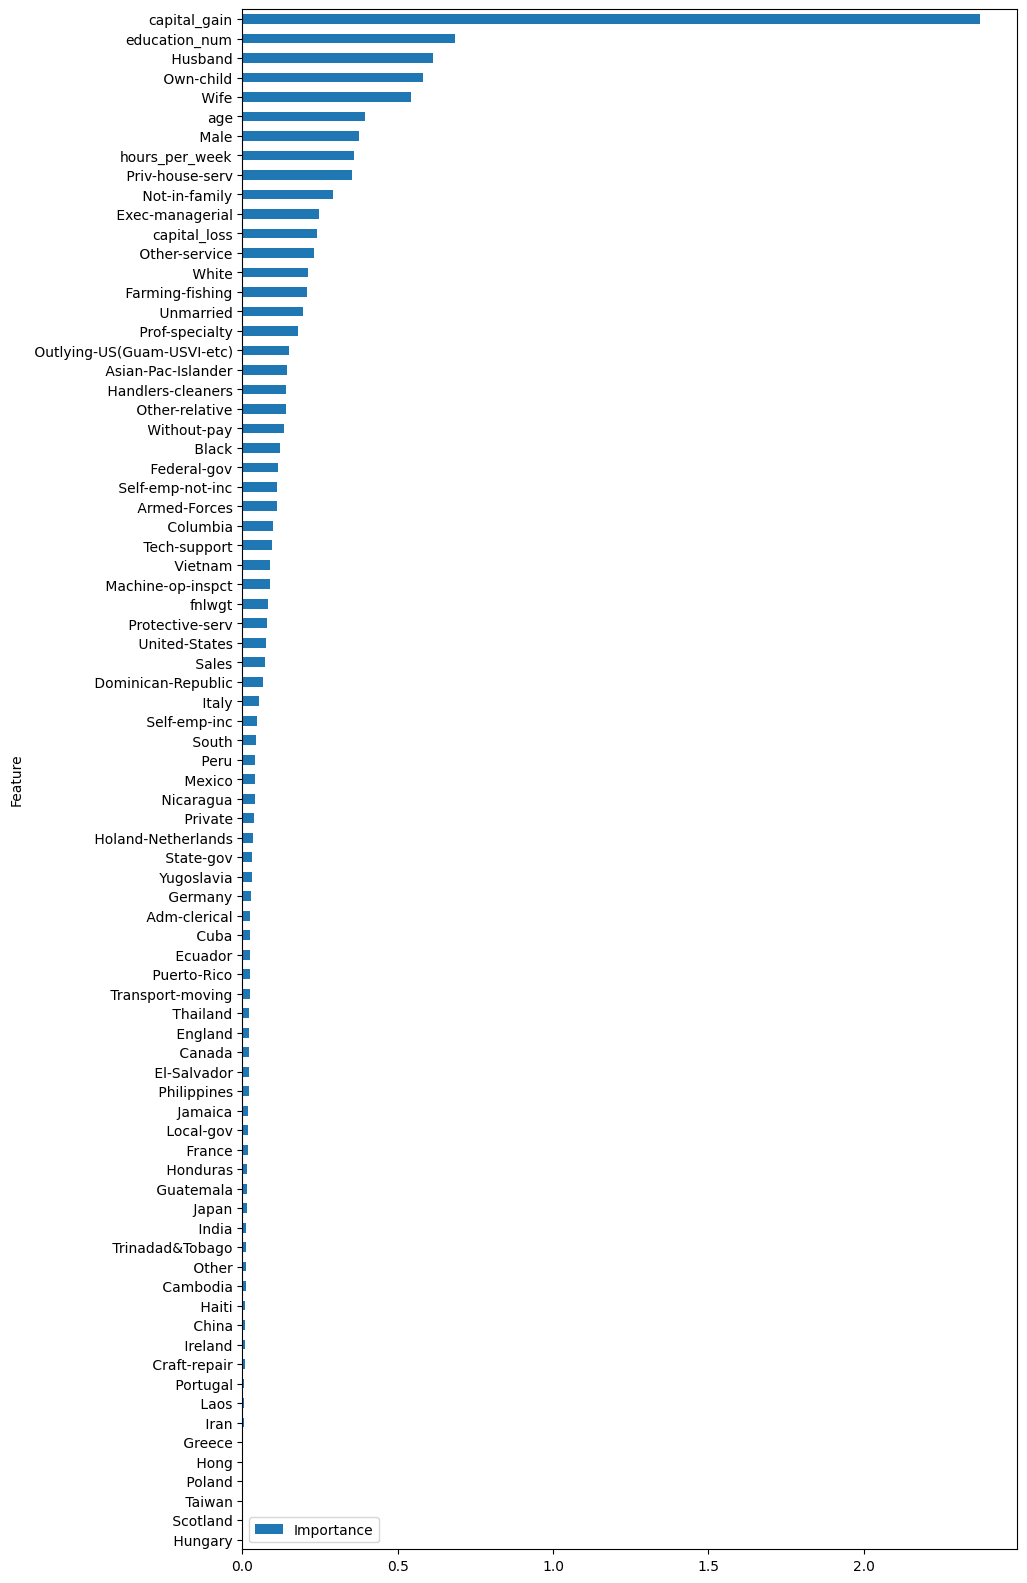

In [100]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 20))

In [101]:
df1 = df.drop(["native_country", "occupation", "workclass"], axis=1)
df1 

,age,fnlwgt,education,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,0
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,0
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,0
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,0
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,0,38,0
32557,40,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,40,1
32558,58,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,0,40,0
32559,22,201490,HS-grad,9,Never-married,Own-child,White,Male,0,0,20,0


In [102]:
df["native_country"].value_counts()

native_country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [103]:
df3  = df2.drop_duplicates()
df3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          30139 non-null  int64
 1   fnlwgt                       30139 non-null  int64
 2   education_num                30139 non-null  int64
 3   capital_gain                 30139 non-null  int64
 4   capital_loss                 30139 non-null  int64
 5   hours_per_week               30139 non-null  int64
 6   income                       30139 non-null  int64
 7    Male                        30139 non-null  int32
 8    Asian-Pac-Islander          30139 non-null  int32
 9    Black                       30139 non-null  int32
 10   Other                       30139 non-null  int32
 11   White                       30139 non-null  int32
 12   Husband                     30139 non-null  int32
 13   Not-in-family               30139 non-null  int32


In [104]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [105]:
predictions_proba = logmodel.predict_proba(X_test)

In [106]:
predictions_proba

array([[0.71583013, 0.28416987],
       [0.76109812, 0.23890188],
       [0.72056915, 0.27943085],
       ...,
       [0.48340956, 0.51659044],
       [0.97443527, 0.02556473],
       [0.90416306, 0.09583694]])

In [107]:
predictions_proba.shape

(9049, 2)

In [108]:
second_elements = predictions_proba[:, 1]

In [109]:
second_elements

array([0.28416987, 0.23890188, 0.27943085, ..., 0.51659044, 0.02556473,
       0.09583694])

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [122]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

In [123]:
print('Confusion Matrix for  Logistic REgression:''\n',cm2 )
print('Accuracy Score for Logistic REgression:',score2 )
print('Classification Report for Logistic REgression:''\n''\n',cr2)
print('Auc Score for Logistic REgression:',auc2 )

Confusion Matrix for  Logistic REgression:
 [[1181 5586]
 [  52 2230]]
Accuracy Score for Logistic REgression: 0.3769477290308321
Classification Report for Logistic REgression:

               precision    recall  f1-score   support

           0       0.96      0.17      0.30      6767
           1       0.29      0.98      0.44      2282

    accuracy                           0.38      9049
   macro avg       0.62      0.58      0.37      9049
weighted avg       0.79      0.38      0.33      9049

Auc Score for Logistic REgression: 0.5758681967847523


In [110]:
from sklearn.naive_bayes import GaussianNB

In [111]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [112]:
predicted = NBmodel.predict(X_test)

In [113]:
predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [114]:
predictions_proba = NBmodel.predict_proba(X_test)

In [115]:
predictions_proba

array([[1.81255498e-027, 1.00000000e+000],
       [1.54485902e-137, 1.00000000e+000],
       [1.03666371e-040, 1.00000000e+000],
       ...,
       [1.64767318e-028, 1.00000000e+000],
       [1.14229484e-024, 1.00000000e+000],
       [9.23401898e-028, 1.00000000e+000]])

In [116]:
second_elements = predictions_proba[:, 1]

In [117]:
second_elements

array([1., 1., 1., ..., 1., 1., 1.])

importance of columnsa bax.tetbiq ele telegramda linki var

Logistic regressionin da neticelerine bax


In [119]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

In [120]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )
print('Accuracy Score for Naive Bayes:',score2 )
print('Classification Report for Naive Bayes:''\n''\n',cr2)
print('Auc Score for Naive Bayes:',auc2 )

Confusion Matrix for Naive Bayes:
 [[1181 5586]
 [  52 2230]]
Accuracy Score for Naive Bayes: 0.3769477290308321
Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.96      0.17      0.30      6767
           1       0.29      0.98      0.44      2282

    accuracy                           0.38      9049
   macro avg       0.62      0.58      0.37      9049
weighted avg       0.79      0.38      0.33      9049

Auc Score for Naive Bayes: 0.5758681967847523
